In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster  import DBSCAN

data=pd.read_csv('./db/whr2017Corrupted.csv') 
data.info()

data.describecribe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     162 non-null    object 
 1   rank        162 non-null    int64  
 2   score       162 non-null    float64
 3   high        162 non-null    float64
 4   low         162 non-null    float64
 5   gdp         162 non-null    float64
 6   family      162 non-null    float64
 7   lifexp      162 non-null    float64
 8   freedom     162 non-null    float64
 9   generosity  162 non-null    float64
 10  corruption  162 non-null    float64
 11  dystopia    162 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 15.3+ KB


,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,81.500000,68.462389,5.495157,5.296645,1.056876,1.196796,0.604505,0.418840,0.274411,0.152814,1.874447
std,46.909487,583.955302,1.290464,1.303680,0.556975,0.324294,0.390162,0.185528,0.207682,0.195968,0.531398
min,1.000000,1.612000,2.586428,1.631572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,41.250000,4.461250,4.568422,4.373797,0.718908,1.042312,0.367188,0.295505,0.157739,0.059416,1.579554
50%,81.500000,5.271000,5.380905,5.193687,1.077181,1.256887,0.614882,0.437454,0.234393,0.092419,1.833961
75%,121.750000,6.103250,6.335461,6.140805,1.351240,1.415360,0.739832,0.519885,0.328316,0.161899,2.175726
max,162.000000,6375.000000,10.586428,9.631572,3.654657,2.371681,2.353141,1.212884,1.169656,1.096026,3.553362


<AxesSubplot:>

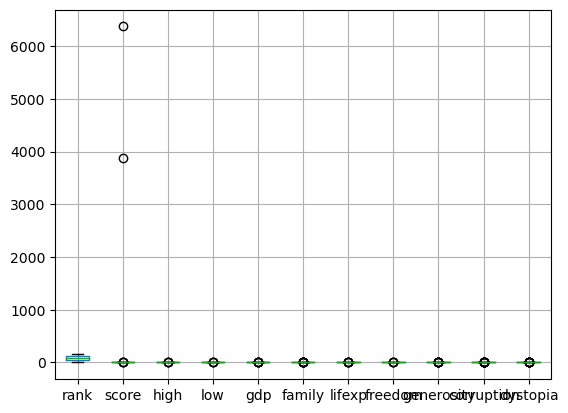

In [9]:
data.boxplot()

In [10]:
data.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Qatar,1,6375.000,6.568477,6.181523,1.870766,1.274297,0.710098,0.604131,0.330474,0.439299,1.145464
1,Zimbabwe,2,3875.000,3.978700,3.771300,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970
2,Norway,3,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
3,Denmark,4,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
4,Iceland,5,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


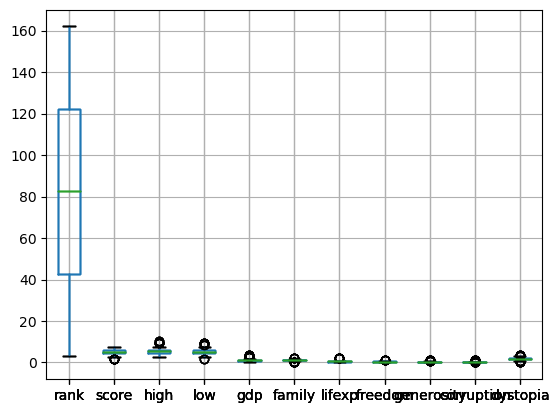

In [14]:
data=data[data['score']<3000]
data.boxplot()
plt.show()

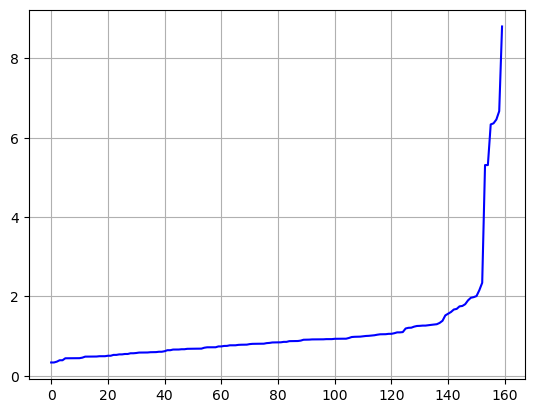

In [21]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

X=data.drop(['country','score','rank'], axis=1)
y=data['score']

X_scaled=StandardScaler().fit_transform(X)

vecinos=NearestNeighbors(n_neighbors=3)
vecinos_fit=vecinos.fit(X_scaled)
distancias,indices = vecinos_fit.kneighbors(X_scaled)
distancias = np.sort(distancias,axis=0)

plt.plot(distancias[:,1],color='blue')
plt.grid()
plt.show()

<Figure size 1800x800 with 0 Axes>

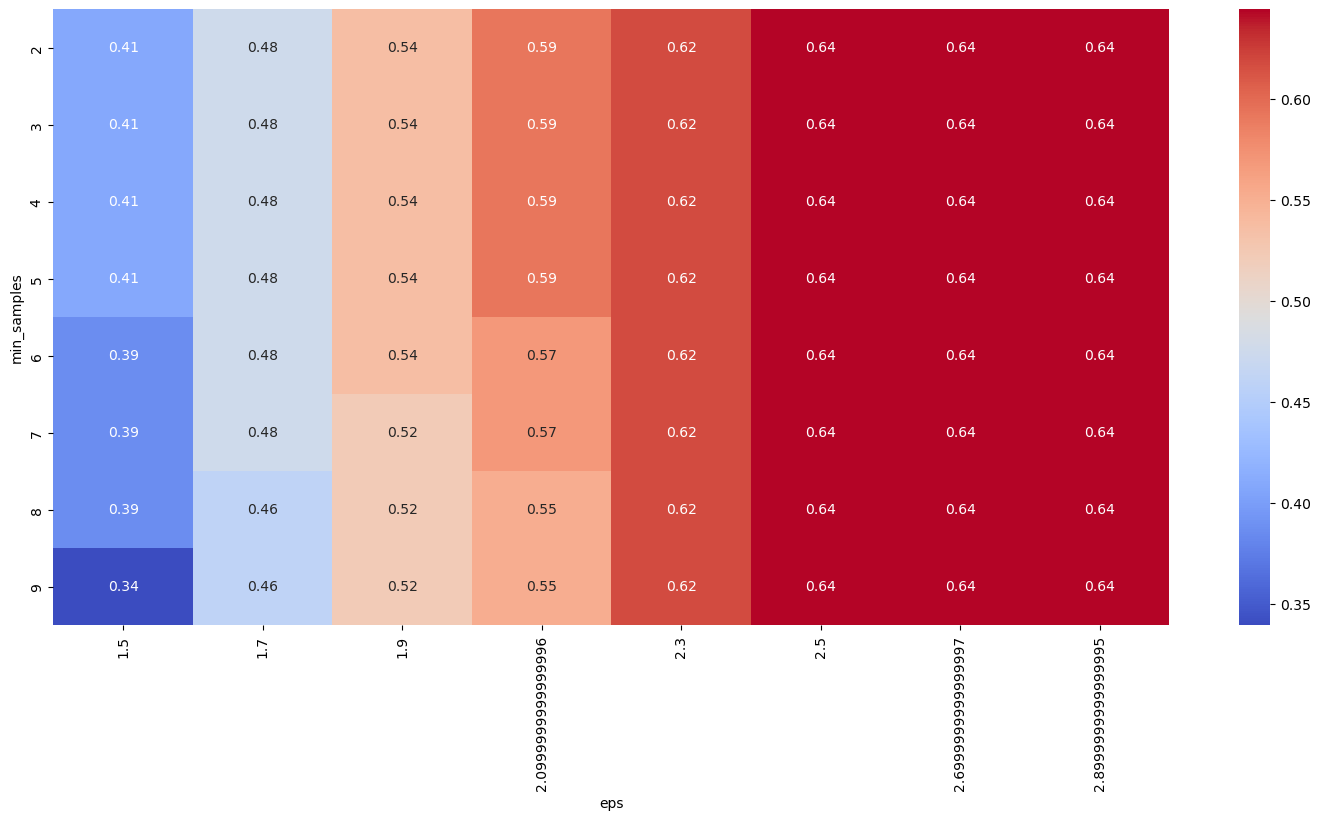

In [33]:
epsv= np.arange(1.5,3,0.2)
min_samples = np.arange(2,10)

from itertools import product
from sklearn.metrics import silhouette_score
import seaborn as sns

paragrid = list(product(epsv,min_samples))

sil_scores=[]

for (eps,min_sample) in paragrid:
    cluster=DBSCAN(eps=eps,min_samples=min_sample).fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled,cluster))

df_tunning=pd.DataFrame.from_records(paragrid,columns=['eps','min_samples'])
df_tunning['sil_scores']= sil_scores

heatmaptable= pd.pivot_table(df_tunning,values='sil_scores',index='min_samples',columns='eps')

plt.figure(figsize=(18,8))
sns.heatmap(heatmaptable, annot=True, cmap='coolwarm')
plt.show()


In [38]:
cluster=DBSCAN(eps=2.5,min_samples=2).fit_predict(X_scaled)
data['cluster']=cluster
data_noise=data[data['cluster']==-1]

data_noise.head(7)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia,cluster
24,Zootopia,25,6.612,2.586428,2.631572,2.654657,0.371681,2.353141,0.212884,1.169656,1.096026,3.553362,-1
111,One Repubic,112,4.612,5.586428,9.631572,2.654657,1.371681,2.353141,0.212884,1.169656,0.096026,1.553362,-1
157,Hyrule,158,2.612,9.586428,6.631572,1.654657,2.371681,0.353141,0.212884,1.169656,1.096026,2.553362,-1
158,Kingdom Hearts,159,2.612,3.586428,1.631572,3.654657,1.371681,2.353141,0.212884,0.169656,0.096026,1.553362,-1
159,Polombia,160,1.612,9.586428,9.631572,2.654657,1.371681,2.353141,1.212884,1.169656,1.096026,1.553362,-1
160,United States of Europe,161,1.612,3.586428,4.631572,1.654657,0.371681,0.353141,1.212884,0.169656,1.096026,2.553362,-1
161,Mushrom Kingdom,162,1.612,10.586428,8.631572,3.654657,2.371681,2.353141,1.212884,1.169656,1.096026,3.553362,-1


El MSE para el SVR es : 0.02071901378258277


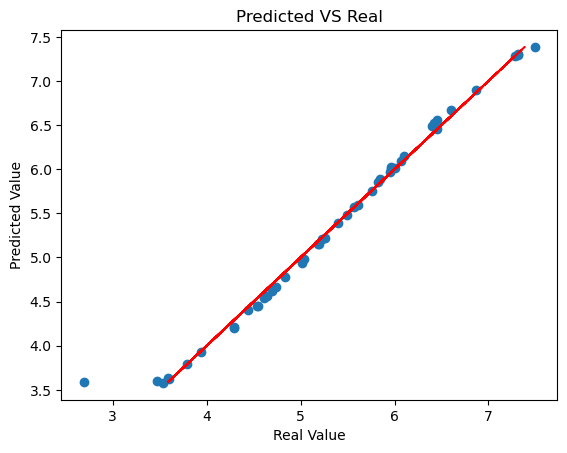

El MSE para el RANSAC es : 1.4786447950852233e-19


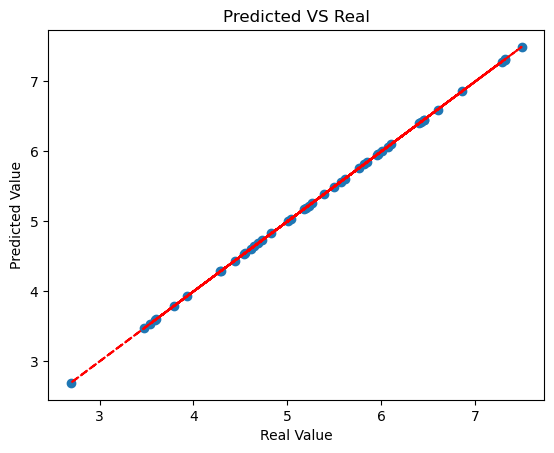

El MSE para el HUBER es : 5.827826078696207e-10


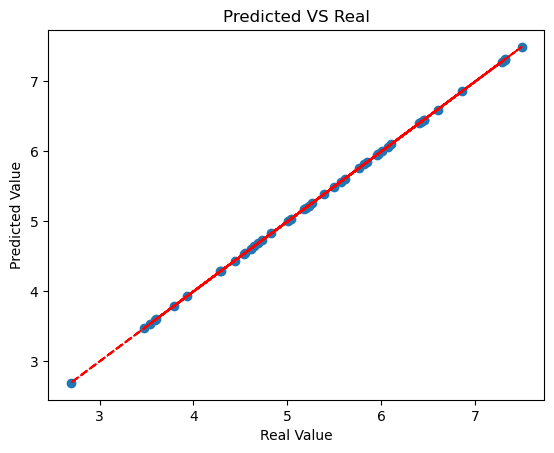

El MSE para el LINEAR es : 1.478645089727258e-19


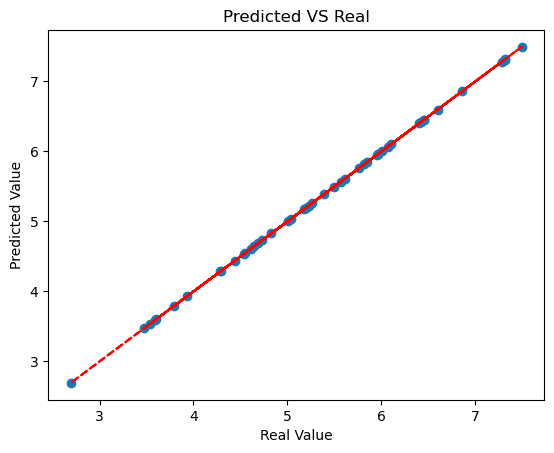

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.linear_model import HuberRegressor, LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error

X= data[data['cluster']==0]
y= X['score']
X= X.drop(['country','score','rank'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=44)
estimators={ 
    'SVR': SVR(gamma='auto',C=1,epsilon=0.1),
    'RANSAC': RANSACRegressor(),
    'HUBER': HuberRegressor(epsilon=1,max_iter=1000),
    'LINEAR': LinearRegression()
}

for type , estimator in estimators.items():
    estimator.fit(X_train,y_train)
    yp = estimator.predict(X_test)
    print('=='*60)
    print(f'El MSE para el {type} es : {mean_squared_error(y_test,yp)}')    
    plt.ylabel('Predicted Value')
    plt.xlabel('Real Value')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, yp)
    plt.plot(yp, yp,'r--')
    plt.show()
    print('=='*60)

El MSE para el SVR es : 0.3938275645060832


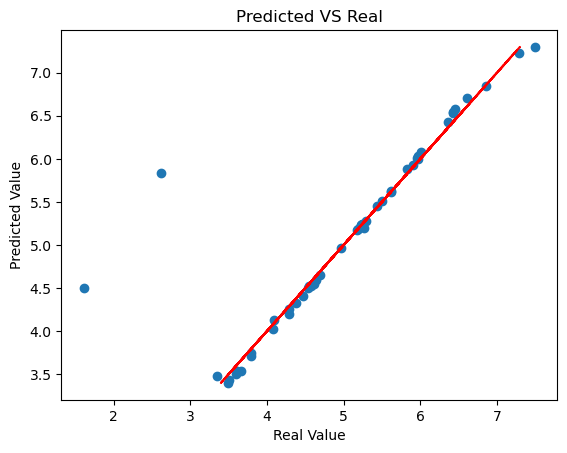

El MSE para el RANSAC es : 0.9492948133843851


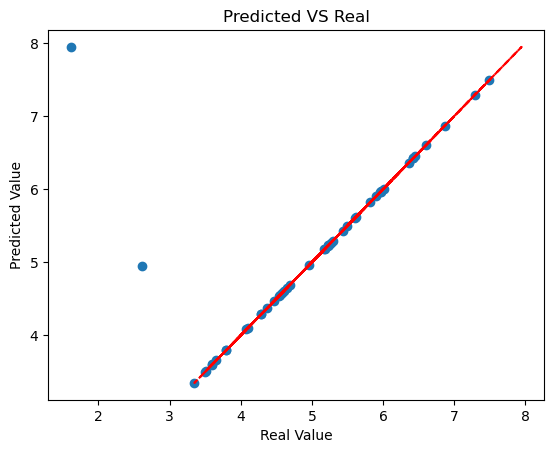

El MSE para el HUBER es : 1.0609540143393736


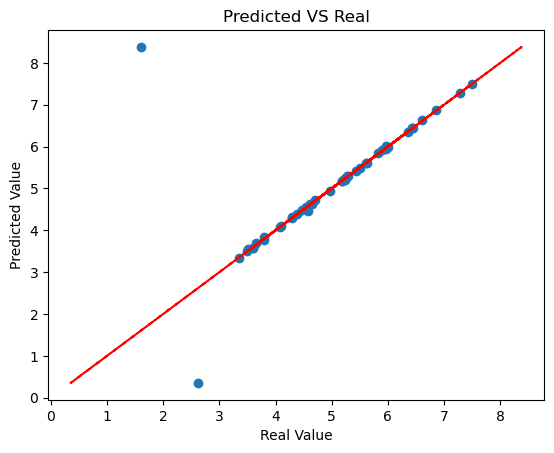

El MSE para el LINEAR es : 1.1874311947955338


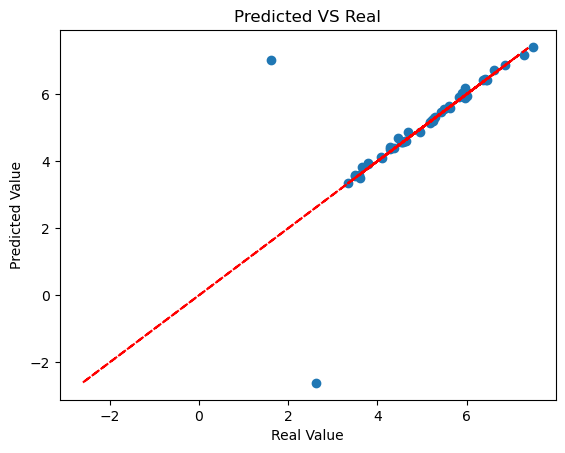

In [44]:
X= data.drop(['country','score','rank'], axis=1)
y= data['score']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=44)
estimators={ 
    'SVR': SVR(gamma='auto',C=1,epsilon=0.1),
    'RANSAC': RANSACRegressor(),
    'HUBER': HuberRegressor(epsilon=1,max_iter=1000),
    'LINEAR': LinearRegression()
}

for type , estimator in estimators.items():
    estimator.fit(X_train,y_train)
    yp = estimator.predict(X_test)
    print('=='*60)
    print(f'El MSE para el {type} es : {mean_squared_error(y_test,yp)}')    
    plt.ylabel('Predicted Value')
    plt.xlabel('Real Value')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, yp)
    plt.plot(yp, yp,'r--')
    plt.show()
    print('=='*60)